# PCA 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasetsf

In [ ]:
dir(datasets)

In [2]:
df = datasets.load_iris()
#df.data #independent variables
#df.target #dependent variable
#df.feature_names #column headers
# print(df.DESCR) #dataset description

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
a = pd.DataFrame(df.data, columns=df.feature_names)
a["Target"] = df.target
a.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.target_names

In [7]:
a.shape

(150, 5)

In [8]:
X=df.data
Y=df.target

In [9]:
X.shape

(150, 4)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=10)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = None) #to view the entire eigen vector,no subsetting

X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance) # how much of variablity in the data can be explained by each principal component

[0.73055142 0.22675973 0.03766536 0.00502349]


In [13]:
sum(explained_variance)

0.9999999999999999

In [ ]:
X_train1

In [33]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.73055142 0.22675973 0.03766536]


In [35]:
sum(explained_variance)

0.9949765125893878

In [36]:
X_train1.shape

(112, 3)

In [37]:
X_train1

array([[ 3.30180845e+00,  1.73195944e-02, -6.97240045e-01],
       [ 1.90723199e+00,  6.58781505e-01,  1.26540623e-01],
       [-1.98631341e+00,  1.72886626e-01,  8.36242182e-02],
       [-1.90277699e+00,  3.99063903e-01,  3.04665246e-01],
       [ 5.76162266e-02, -1.06494650e+00,  5.21818459e-01],
       [-1.77366979e+00, -2.35706075e+00, -2.23298524e-01],
       [ 7.67025994e-01,  7.23244188e-01,  1.50254060e-01],
       [-2.55564946e+00,  1.69014252e+00,  5.84666297e-02],
       [ 1.25620830e+00,  5.81830727e-01, -5.45288109e-01],
       [ 7.61301126e-01,  3.48517455e-01,  6.09015808e-01],
       [ 1.00647482e+00, -6.02128554e-01,  8.10029853e-01],
       [ 1.99866713e+00,  1.00643181e+00,  6.26880661e-01],
       [ 1.25982658e+00, -1.61844052e+00, -4.92207712e-01],
       [ 2.24914569e+00,  1.86783967e+00,  4.02193266e-01],
       [ 7.43964145e-02, -1.58706657e+00, -2.52137194e-01],
       [ 6.95038294e-01, -2.59043473e-01,  8.05462281e-02],
       [ 7.53765094e-01,  5.50656860e-01

In [38]:
# Fitting SVC to the Training set
from sklearn.svm import SVC

classifier = SVC(kernel="rbf",gamma=0.1, C=1)

classifier.fit(X_train1, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test1)


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Accuracy of the model:  1.0


In [ ]:
0.9473684210526

## With Three Component 

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state = 10)

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 3
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72908626 0.22643525]


In [44]:
# Fitting SVC to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",gamma=0.1,C=1)
classifier.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = classifier.predict(X_test)


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10  0  0]
 [ 0 10  3]
 [ 0  0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.77      0.87        13
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Accuracy of the model:  0.9


## Visualization 

C:\Users\Dev\AppData\Local\Temp\ipykernel_32784\3553134492.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


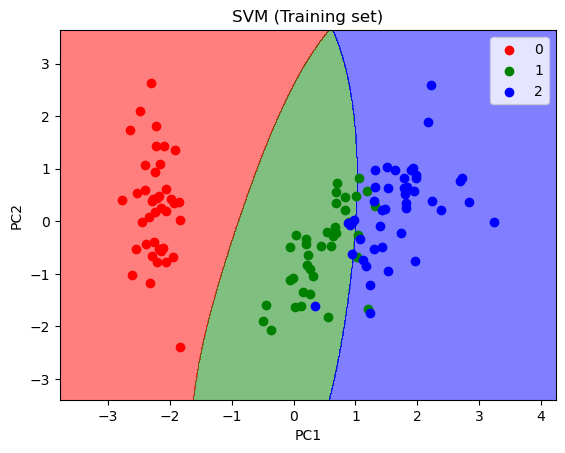

In [46]:
# Visualising the Training set results (https://justpaste.it/4qo19)
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(
                     np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01),
                     
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(), 
                                        X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, 
             cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


C:\Users\Dev\AppData\Local\Temp\ipykernel_32784\2011957198.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


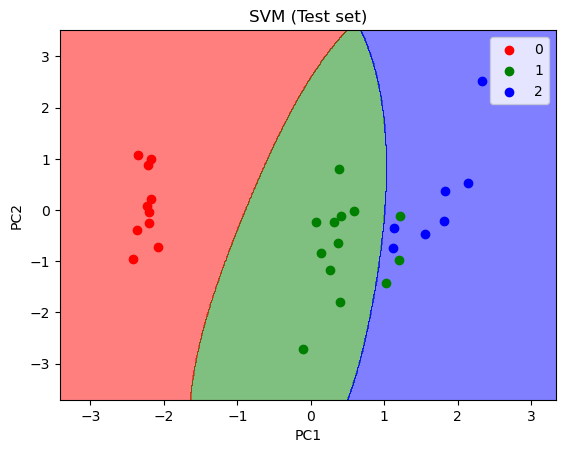

In [47]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Different Dataset

In [48]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [49]:
df=pd.read_csv("Processed_adult.csv", index_col=0,header=0)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [50]:
df.shape

(32561, 15)

In [51]:
X=df.values[:,:-1]
Y=df.values[:,-1]

In [52]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)


In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
df.shape

(32561, 15)

In [59]:
# Applying PCA
from sklearn.decomposition import PCA
N =  0.80  # None , 1, 2, 3 ...
pca = PCA(n_components = N )
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(len(explained_variance))
print("Total Variance: {} on {} Features ".format(sum(explained_variance), N))

[0.14822853 0.10132163 0.08087826 0.07791618 0.07439686 0.07293743
 0.07010901 0.06793779 0.06479797 0.06152477]
10
Total Variance: 0.8200484315148535 on 0.8 Features 


In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.97)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

In [ ]:
pca.n_components_

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train2,Y_train)

Y_pred=classifier.predict(X_test2)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
#14 Vars-->82.27%
#12 vars-->82.38%
#9 vars-->82.16


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)


In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('LR (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()